In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import spearmanr

data_file_path = r"C:\Users\govertsen.k\Northeastern University\Community Resilience in Extreme Temperatures - Data\Vulnerability Mapping"
data_file_path = data_file_path.replace(os.sep, '/')

In [2]:
# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

extension = 'csv'
os.chdir(data_file_path)
result = glob.glob('*.{}'.format(extension))

death = pd.read_csv(data_file_path + '/Merged_Death_Data.csv',low_memory=False)
death = death.sort_values(by='date_of_death')
death = death.reset_index(drop=True)
death['date_of_death'] = pd.to_datetime(death['date_of_death'])

weather = pd.read_csv(data_file_path + '/Weather Files/USW00094746.csv',low_memory=False)
#weather = weather.sort_values(by='DATE')
weather['DATE'] = pd.to_datetime(weather['DATE'])

In [3]:
# reduce weather 
weather = weather.loc[(weather['DATE'] >= death['date_of_death'][0]) & (weather['DATE'] <= death['date_of_death'].iloc[-1]) ]
weather = weather.reset_index(drop=True)
weather = weather[['STATION','DATE','TMAX']]
weather = weather.dropna()

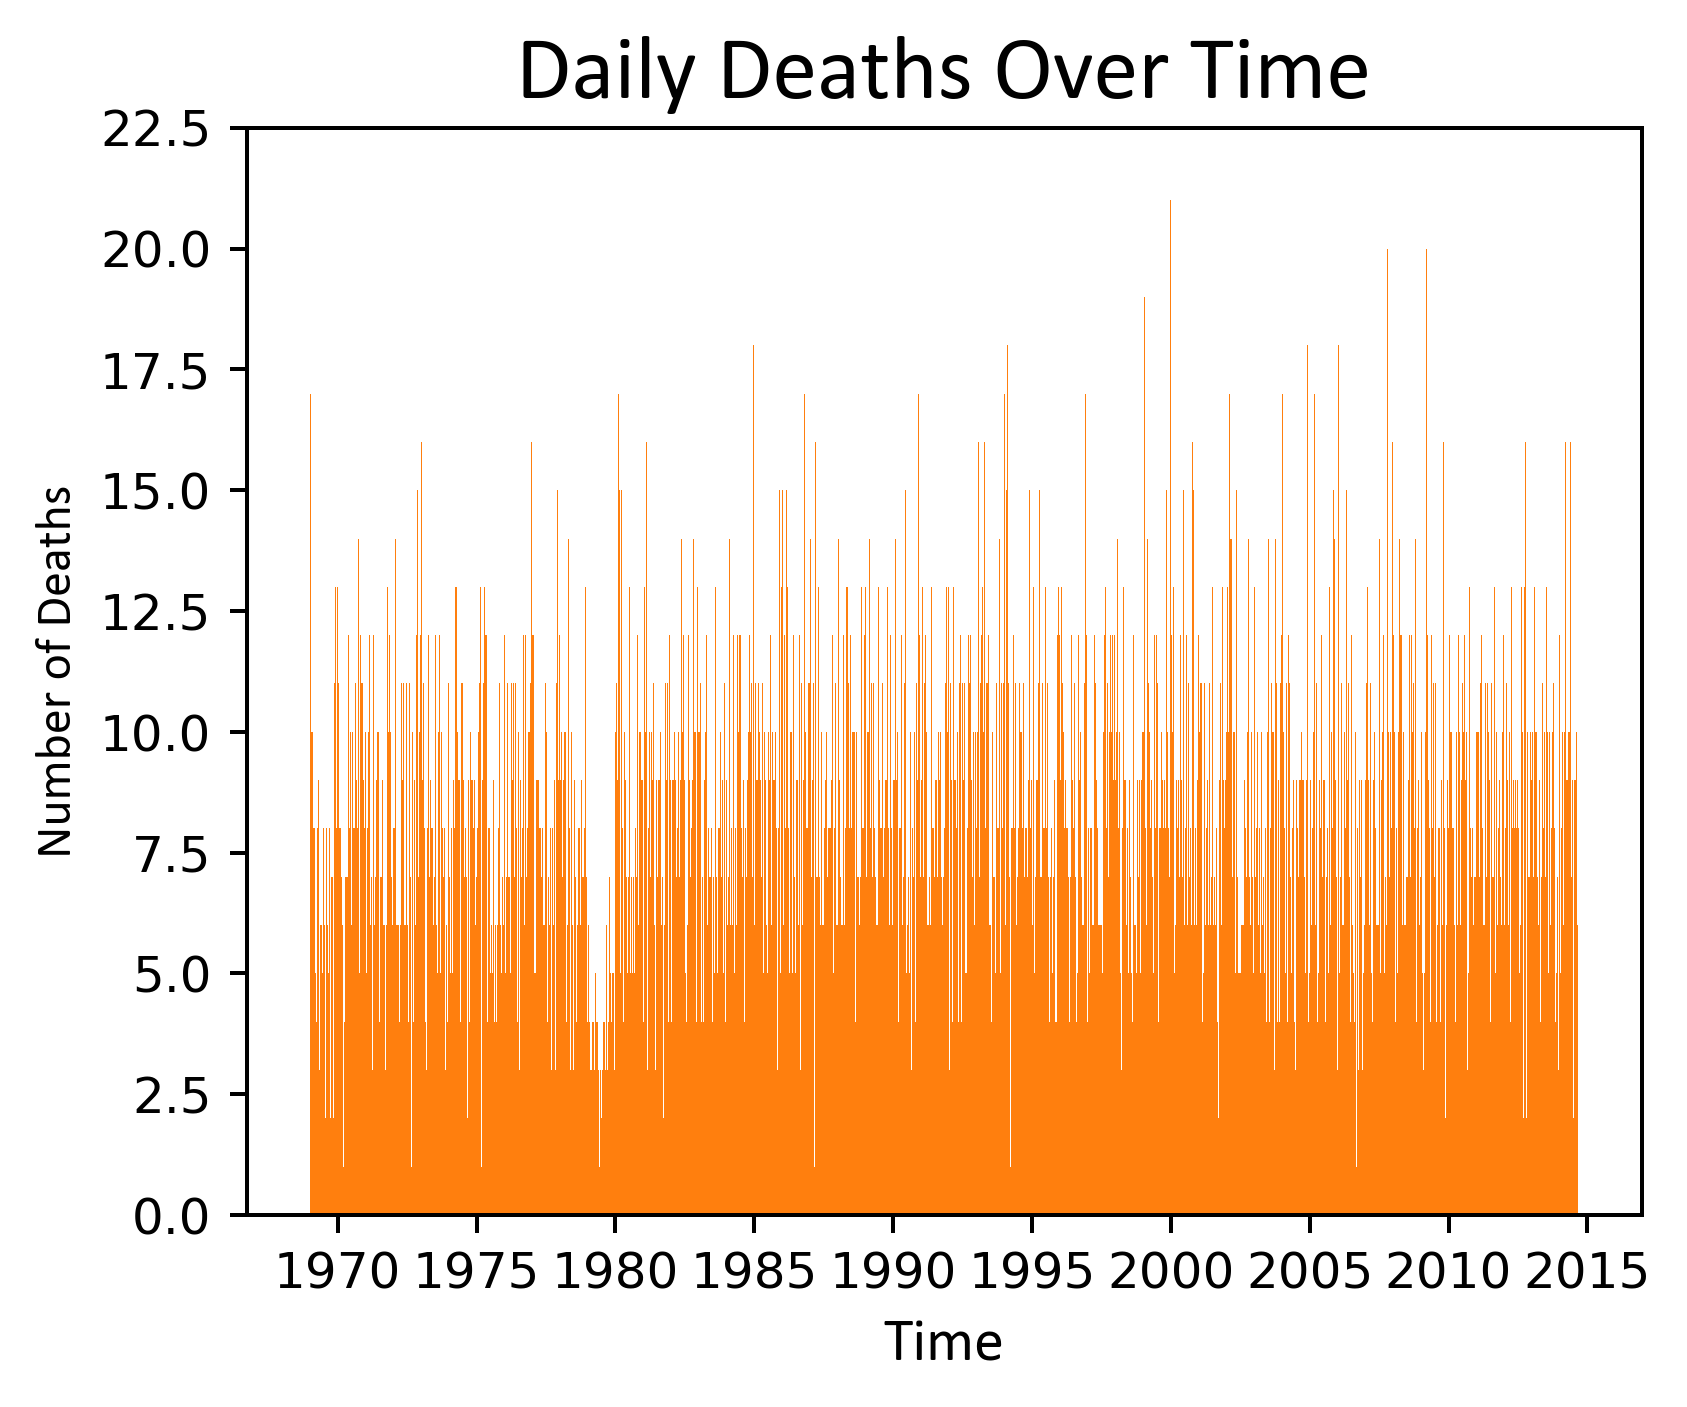

In [4]:
f1=plt.figure(figsize=(5,4),dpi=360)
plt.hist(death['date_of_death'],bins=pd.unique(death['date_of_death']))
plt.ylim([0,22.5])
plt.ylabel('Number of Deaths', fontsize=ticksize,**labelfont)
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.title('Daily Deaths Over Time',fontsize=titlesize,**labelfont)
counts, bins, bars = plt.hist(death['date_of_death'],bins=pd.unique(death['date_of_death']))

Text(0.5, 1.0, 'Daily Weather')

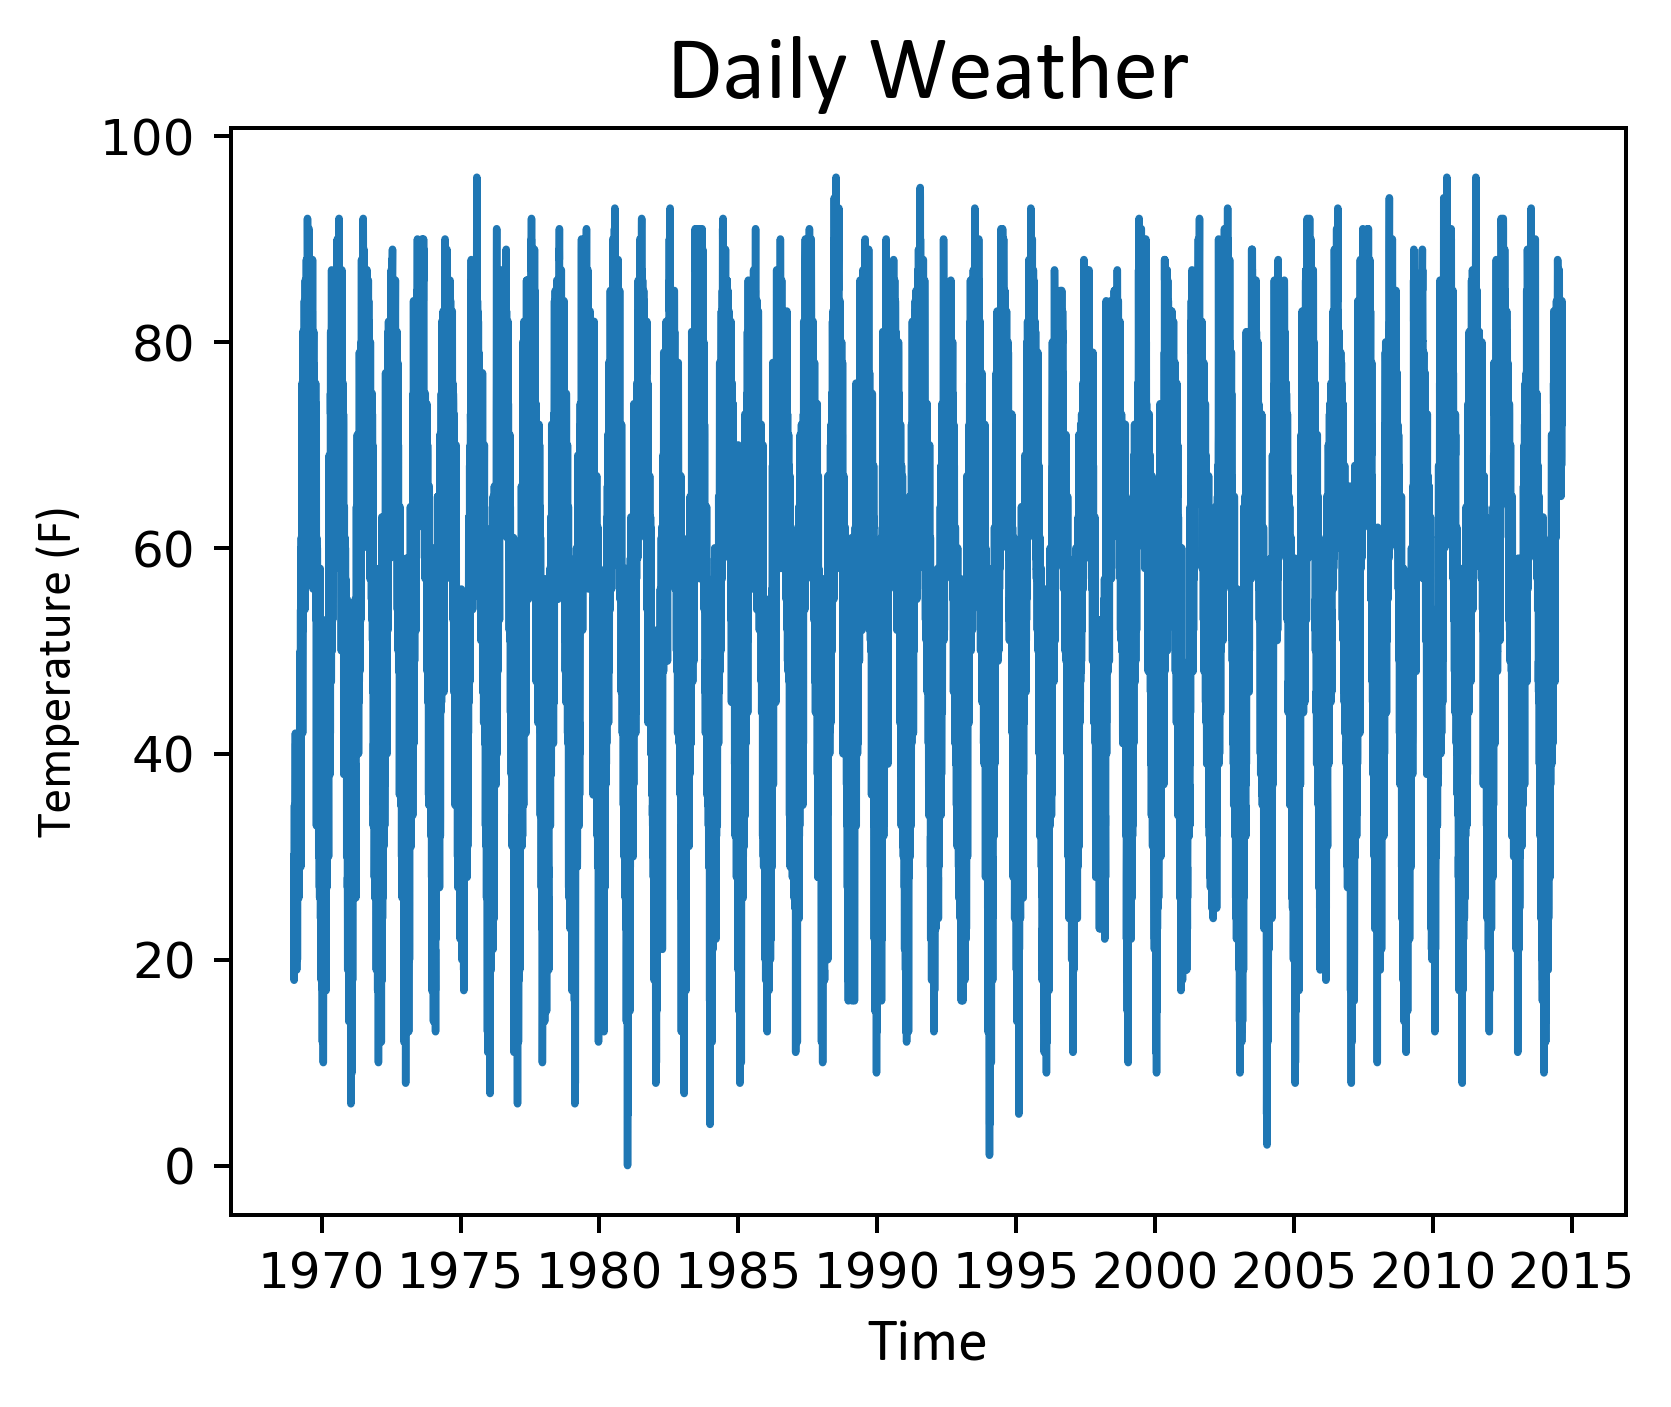

In [5]:
f2=plt.figure(figsize=(5,4),dpi=360)
plt.plot(weather['DATE'],weather['TMAX'])
plt.ylabel('Temperature (F)', fontsize=ticksize,**labelfont)
plt.xlabel('Time',fontsize=labelsize,**labelfont)
plt.title('Daily Weather',fontsize=titlesize,**labelfont)

Text(0.5, 1.0, 'Temperature Histogram')

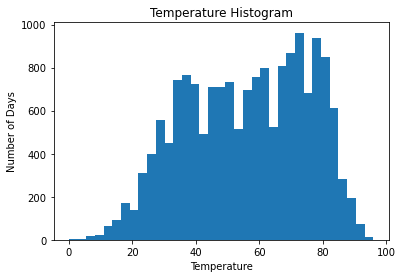

In [6]:
plt.hist(weather['TMAX'],bins=35)
plt.xlabel('Temperature')
plt.ylabel('Number of Days')
plt.title('Temperature Histogram')

In [7]:
weather['DEATH']=0
for each_date in weather['DATE']:
    weather.loc[weather['DATE'] == each_date,'DEATH'] = len(death.loc[death['date_of_death'] == each_date])
weather['DEATH2'] = weather['DEATH'].rolling(2).sum().shift(-2)
weather['DEATH3'] = weather['DEATH'].rolling(3).sum().shift(-3)

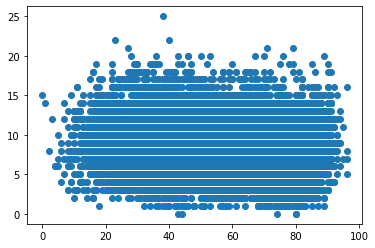

In [8]:
plt.scatter(weather['TMAX'],weather['DEATH'])

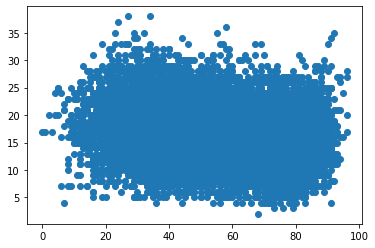

In [9]:
plt.scatter(weather['TMAX'],weather['DEATH2'])

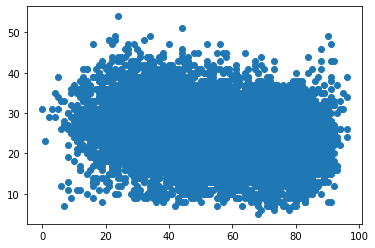

In [10]:
plt.scatter(weather['TMAX'],weather['DEATH3'])

<AxesSubplot:title={'center':'DEATH'}, xlabel='TMAX'>

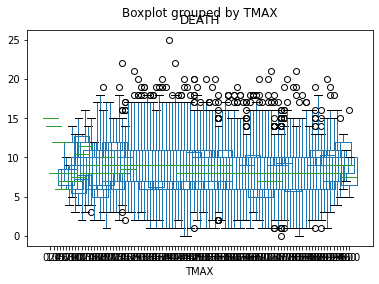

In [11]:
weather.boxplot(by='TMAX',column='DEATH',grid=False,widths=5)

In [12]:
#range(
import math
by = 3
xticks = np.arange(min(weather['TMAX']),math.ceil(max(weather['TMAX'])/by)*by+by,by)
weather['GROUP']=0
for each_tick in xticks:
    weather.loc[(weather['TMAX']>=each_tick)&(weather['TMAX']<each_tick+by),'GROUP'] = each_tick

Text(0, 0.5, 'Number of Deaths')

<Figure size 1800x1440 with 0 Axes>

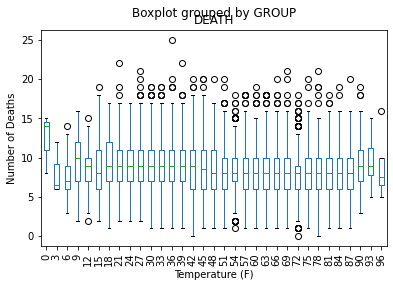

In [13]:
f3=plt.figure(figsize=(5,4),dpi=360)
weather.boxplot(by='GROUP',column='DEATH',grid=False,rot=90)
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Deaths')

Text(0.5, 1.0, 'Rolling Death Average (Day of and Next Day)')

<Figure size 1800x1440 with 0 Axes>

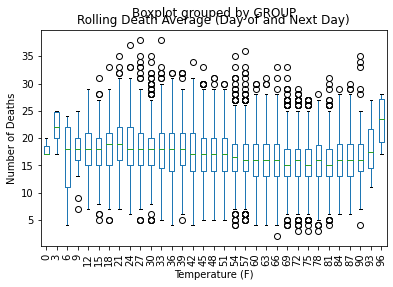

In [14]:
f3=plt.figure(figsize=(5,4),dpi=360)
weather.boxplot(by='GROUP',column='DEATH2',grid=False,rot=90)
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Deaths')
plt.title('Rolling Death Average (Day of and Next Day)')

Text(0.5, 1.0, 'Rolling Average (Day of and Next Two Days)')

<Figure size 1800x1440 with 0 Axes>

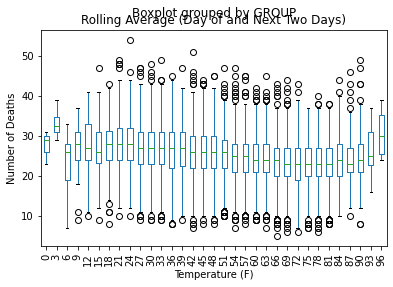

In [15]:
f3=plt.figure(figsize=(5,4),dpi=360)
weather.boxplot(by='GROUP',column='DEATH3',grid=False,rot=90)
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Deaths')
plt.title('Rolling Average (Day of and Next Two Days)')

In [16]:
weather = weather.dropna()

In [17]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(weather['TMAX'],weather['DEATH'])

#print Spearman rank correlation and p-value
print(rho)

print(p)



-0.13462324437318135
2.9829612469108848e-68


In [18]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = spearmanr(weather['TMAX'],weather['DEATH2'])

#print Spearman rank correlation and p-value
print(rho)

print(p)



-0.20050177391844157
1.0132832493486887e-150


In [19]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(weather['TMAX'],weather['DEATH3'])

#print Spearman rank correlation and p-value
print(rho)

print(p)



-0.23784830961848624
4.739684087953703e-213


In [21]:
# Split by weather type
cold_weather = weather.loc[weather['TMAX'] <= 32]
hot_weather = weather.loc[weather['TMAX']>=80]
typical_weather = weather.loc[(weather['TMAX'] > 32) & (weather['TMAX'] < 80) ]


In [23]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(cold_weather['TMAX'],cold_weather['DEATH'])

#print Spearman rank correlation and p-value
print('spearman rank for cold vs death:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(cold_weather['TMAX'],cold_weather['DEATH2'])

#print Spearman rank correlation and p-value
print('spearman rank for cold vs death2:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(cold_weather['TMAX'],cold_weather['DEATH3'])

#print Spearman rank correlation and p-value
print('spearman rank for cold vs death3:')
print(rho)
print(p)



spearman rank for cold vs death:
0.011769035836776168
0.5786548442772361
spearman rank for cold vs death2:
-0.051691620640944166
0.014657104865676535
spearman rank for cold vs death3:
-0.05680047679536675
0.007310872850539731


In [24]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(typical_weather['TMAX'],typical_weather['DEATH'])

#print Spearman rank correlation and p-value
print('spearman rank for typical vs death:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value

rho, p = spearmanr(typical_weather['TMAX'],typical_weather['DEATH2'])

#print Spearman rank correlation and p-value
print('spearman rank for typical vs death2:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(typical_weather['TMAX'],typical_weather['DEATH3'])

#print Spearman rank correlation and p-value
print('spearman rank for typical vs death3:')
print(rho)
print(p)



spearman rank for typical vs death:
-0.13489507796024097
1.6111650781071308e-51
spearman rank for typical vs death2:
-0.1795100089562041
1.920301050596356e-90
spearman rank for typical vs death3:
-0.207150121007728
1.9049503373163677e-120


In [25]:
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(hot_weather['TMAX'],hot_weather['DEATH'])

#print Spearman rank correlation and p-value
print('spearman rank for hot vs death:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value

rho, p = spearmanr(hot_weather['TMAX'],hot_weather['DEATH2'])

#print Spearman rank correlation and p-value
print('spearman rank for hot vs death2:')
print(rho)
print(p)

#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(hot_weather['TMAX'],hot_weather['DEATH3'])

#print Spearman rank correlation and p-value
print('spearman rank for hot vs death3:')
print(rho)
print(p)



spearman rank for hot vs death:
0.08499574308954627
0.0001314673651473381
spearman rank for hot vs death2:
0.07236124901564717
0.001139201902353095
spearman rank for hot vs death3:
0.062098208180760624
0.005250612639851338
